In [1]:
# Written by Xiuxia Du, 2019 Spring

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd
#from sklearn.decomposition import PCA
from matplotlib.mlab import PCA
from ML_toolbox import d_PCA

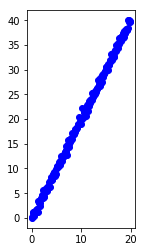

In [2]:
# ----------------------------------------------------------------
# A first glimpse at PCA
# ----------------------------------------------------------------

# 1. generate the raw data
x1 = np.arange(start=0, stop=20, step=0.1)
x2 = 2 * x1 + np.random.normal(loc=0, scale=0.5, size=len(x1))

# 2. visualize the raw data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x1, x2, color='blue')
ax.set_aspect('equal', 'box')

In [3]:
# 3. do PCA
dataForAnalysis = np.column_stack((x1, x2))

useCorr = False
obj_PCA = d_PCA.d_PCA(num_of_components=2, corr_logic=useCorr)
myPCAResults = obj_PCA.fit_transform(x=dataForAnalysis)

percentVarianceExplained = 100 * myPCAResults['PC_variance'][0] / sum(myPCAResults['PC_variance'])
print("PC1 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')

PC1 explains: 99.97% variance



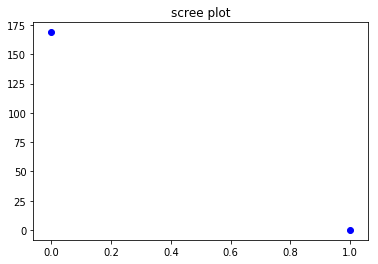

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scree plot')
ax.scatter(range(len(myPCAResults['PC_variance'])), myPCAResults['PC_variance'], color='blue')

Text(0, 0.5, 'PC2')

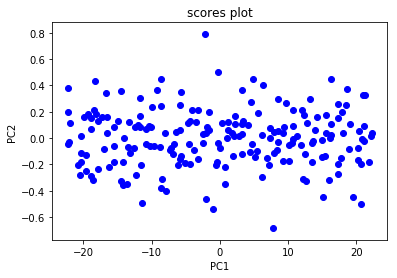

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scores plot')
ax.scatter(myPCAResults['scores'][:,0], myPCAResults['scores'][:,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Text(0, 0.5, 'PC2')

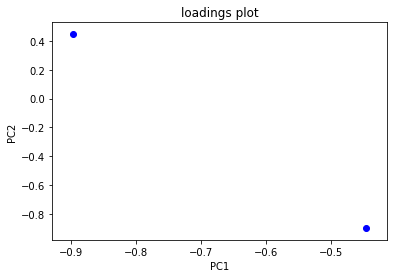

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('loadings plot')
ax.scatter(myPCAResults['loadings'][:,0], myPCAResults['loadings'][:,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

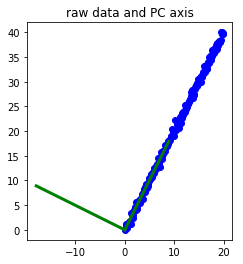

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('raw data and PC axis')
ax.scatter(x1, x2, color='blue')
ax.plot([0, -20*myPCAResults['loadings'][0,0]], [0, -20*myPCAResults['loadings'][1,0]],
        color='green', linewidth=3)
ax.plot([0, 20 * myPCAResults['loadings'][0, 1]], [0, 20 * myPCAResults['loadings'][1, 1]],
        color='green',linewidth=3)
ax.set_aspect('equal', 'box')

Text(0, 0.5, 'x2')

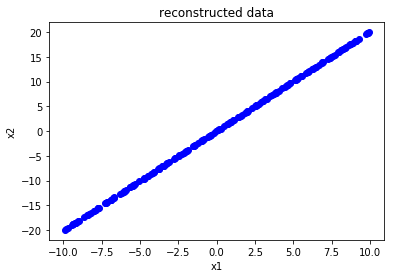

In [8]:
# keep only the first dimension
dataReconstructed = np.matmul(myPCAResults['scores'][:, 0].reshape((200, 1)), myPCAResults['loadings'][:,0].reshape((1,2)))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('reconstructed data')
ax.scatter(dataReconstructed[:, 0], dataReconstructed[:, 1], color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

Text(0, 0.5, 'x2')

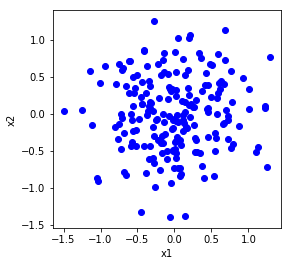

In [9]:
# ----------------------------------------------------------------
# PCA on completely random data
# ----------------------------------------------------------------
# 1. generate raw data
x1 = np.random.normal(loc=0, scale=0.5, size=len(x1))
x2 = np.random.normal(loc=0, scale=0.5, size=len(x1))

# 2. visualize the raw data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x1, x2, color='blue')
ax.set_aspect('equal', 'box')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [10]:
# 3. do PCA
dataForAnalysis = np.column_stack((x1, x2))

useCorr = False
obj_PCA = d_PCA.d_PCA(num_of_components=2, corr_logic=useCorr)
myPCAResults = obj_PCA.fit_transform(x=dataForAnalysis)

percentVarianceExplained = 100 * myPCAResults['PC_variance'][0] / sum(myPCAResults['PC_variance'])
print("PC1 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')

PC1 explains: 52.23% variance



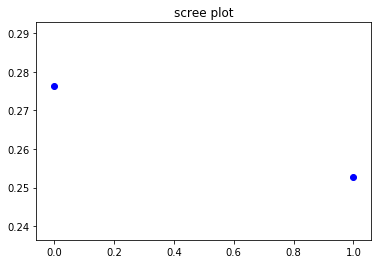

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scree plot')
ax.scatter(range(len(myPCAResults['PC_variance'])), myPCAResults['PC_variance'], color='blue')

Text(0, 0.5, 'PC2')

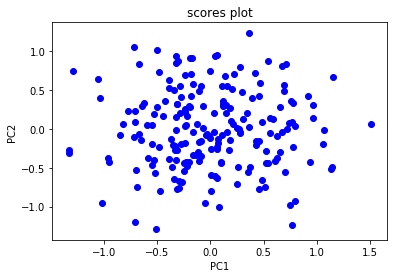

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scores plot')
ax.scatter(myPCAResults['scores'][:,0], myPCAResults['scores'][:,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Text(0, 0.5, 'PC2')

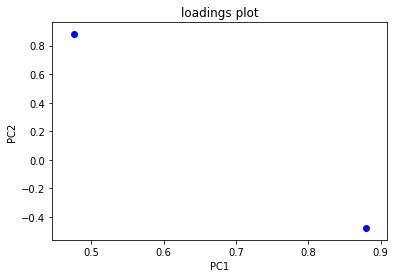

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('loadings plot')
ax.scatter(myPCAResults['loadings'][:,0], myPCAResults['loadings'][:,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

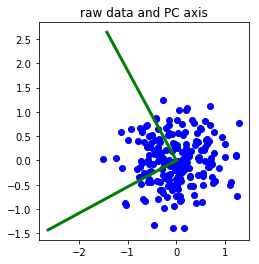

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('raw data and PC axis')
ax.scatter(x1, x2, color='blue')
k=3
ax.plot([0, (-1)*k*myPCAResults['loadings'][0,0]], [0, (-1)*k*myPCAResults['loadings'][1,0]],
        color='green', linewidth=3)
ax.plot([0, k * myPCAResults['loadings'][0, 1]], [0, k * myPCAResults['loadings'][1, 1]],
        color='green',linewidth=3)
ax.set_aspect('equal', 'box')

Text(0, 0.5, 'y')

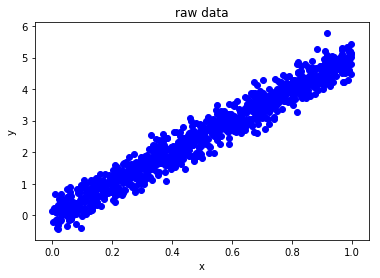

In [15]:
# ----------------------------------------------------------------
# PCA on toy data
# ----------------------------------------------------------------
# 1. get the raw data
in_file_name = "./data/dataset_1.csv"
dataIn = pd.read_csv(in_file_name)

# 2. visualize the raw data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title("raw data")
ax.scatter(dataIn['x'], dataIn['y'], color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')

Text(0, 0.5, 'z')

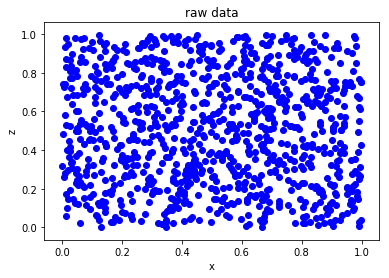

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title("raw data")
ax.scatter(dataIn['x'], dataIn['z'], color='blue')
ax.set_xlabel('x')
ax.set_ylabel('z')

In [17]:
# 3. do PCA
dataForAnalysis = dataIn.values
useCorr = False

obj_PCA = d_PCA.d_PCA(num_of_components=2, corr_logic=useCorr)
myPCAResults = obj_PCA.fit_transform(x=dataForAnalysis)

percentVarianceExplained = 100 * myPCAResults['PC_variance'][0] / sum(myPCAResults['PC_variance'])
print("PC1 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')

PC1 explains: 96.29% variance



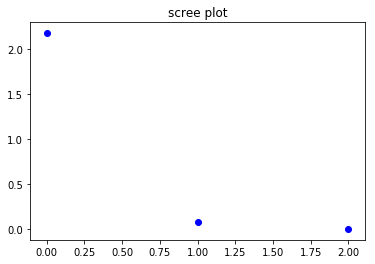

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scree plot')
ax.scatter(range(len(myPCAResults['PC_variance'])), myPCAResults['PC_variance'], color='blue')

Text(0, 0.5, 'PC2')

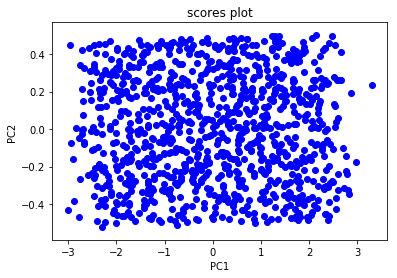

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scores plot')
ax.scatter(myPCAResults['scores'][:,0], myPCAResults['scores'][:,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Text(0, 0.5, 'PC2')

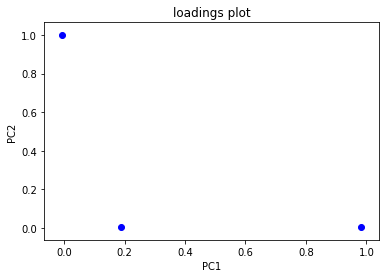

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('loadings plot')
ax.scatter(myPCAResults['loadings'][:,0], myPCAResults['loadings'][:,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

In [21]:
in_file_name = './data/SCLC_study_output_filtered.csv'
dataIn = pd.read_csv(in_file_name, header=0, index_col=0)
dataForAnalysis = dataIn.values

useCorr = True
obj_PCA = d_PCA.d_PCA(num_of_components=2, corr_logic=useCorr)
myPCAResults = obj_PCA.fit_transform(x=dataForAnalysis)

percentVarianceExplained = 100 * myPCAResults['PC_variance'][0] / sum(myPCAResults['PC_variance'])
print("PC1 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')

PC1 explains: 27.87% variance



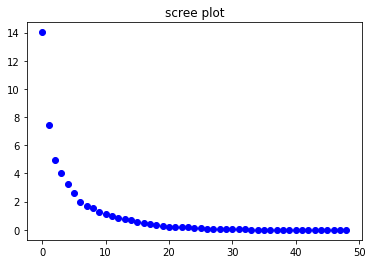

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scree plot')
ax.scatter(range(len(myPCAResults['PC_variance'])), myPCAResults['PC_variance'], color='blue')

Text(0, 0.5, 'PC2')

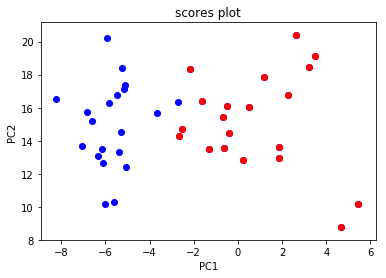

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scores plot')
ax.scatter(myPCAResults['scores'][:, 0], myPCAResults['scores'][:, 1], color='blue')
ax.scatter(myPCAResults['scores'][0:20, 0], myPCAResults['scores'][0:20, 1], color='red')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Text(0, 0.5, 'PC2')

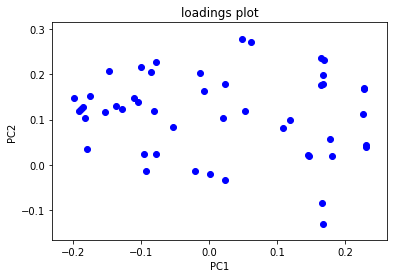

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('loadings plot')
ax.scatter(myPCAResults['loadings'][:,0], myPCAResults['loadings'][:,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')